# Bike Sharing: Predicción de Demanda Horaria

En esta secci´on simularemos nuestra participaci´on en el desaf´ıo Bike Sharing Demand de Kaggle [3]. El
objetivo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington,
D.C., en funci´on de la hora del d´ıa y otras variables descritas en la tabla 1. En principio, y como muestra
la figura, la funci´on es altamente no lineal y no determinista como funci´on de la hora del d´ıa. Su objetivo
ser´a entrenar un modelo para obtener un puntaje correspondiente al top-100 del “leaderboard” final, es
decir superior o igual a 0.37748. La funci´on utilizada para evaluar este concurso Kaggle se proporciona en la
siguiente ecuaci´on:
Ebikes(y, yˆ) = 1
n
X
i
(ln(yi + 1) − ln(ˆyi + 1))2
, (1)
donde y, yˆ ∈ R
n denotan los vectores de observaciones y predicciones respectivamente.
Como el dataset de pruebas original no est´a disponible se fabricar´a uno, correspondiente al 20 % de los
datos de entrenamiento. Adem´as, se pondr´a a su disposici´on un subconjunto independiente de datos con
prop´ositos de validaci´on. Usted podr´a descargar los archivos correspondientes al subconjunto de entrenamiento
y pruebas a utilizar ejecutando los siguientes comandos:

El objetivo del presente trabajo es predecir la demanda de bicicletas sobre la red Capital Bikeshare de la ciudad de Washington, D.C.

### a) Carga de datos

(a) Cargue los datos de entrenamiento y pruebas como dataframes de pandas. Describa las variables involucradas
en el problema, explorando el tipo de datos de que se trata, el n´umero de valores distintos y, si
corresponde, un gr´afico (e.g. un histograma) que resuma su comportamiento. Su primera operaci´on de
pre-procesamiento de datos ser´a obtener la hora del d´ıa desde el campo fecha (que en este momento es
de tipo string), creando una nueva columna denominada hour y de tipo int. Para hacer esta operaci´on
se concatenar´an los dataframes de entrenamiento y pruebas y luego se volver´an a separar manteniendo
la separaci´on original.

Para comenzar se cargan los tres conjuntos de datos: entrenamiento, validación y prueba como dataframes de pandas.

In [5]:
import pandas as pd
import numpy as np
dftrain = pd.read_csv('bike_sharing_train.csv')
dfval = pd.read_csv('bike_sharing_val.csv')
dftest = pd.read_csv('bike_sharing_test.csv')
ntrain = len(dftrain)
nval = len(dftrain) + len(dfval)
df = pd.concat([dftrain,dfval,dftest])
print "Cantidad datos, DataType"
print df.info()
print '\nSummary - dataframe completo:\n'
print df.describe()
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['hour'] = pd.to_numeric(df['hour'])

Cantidad datos, DataType
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10886 entries, 0 to 2146
Data columns (total 13 columns):
Unnamed: 0    10886 non-null int64
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 1.2+ MB
None

Summary - dataframe completo:

         Unnamed: 0        season       holiday    workingday       weather  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean    5442.500000      2.506614      0.028569      0.680875      1.418427   
std     3142.661849      1.116174      0.166599      0.466159      0.

In [4]:
print "Cantidad de datos set entrenamiento: ",len(dftrain)
print "Cantidad de datos validación: ",len(dfval)
print "Cantidad de datos testing: ", len(dftest)
print "Datos totales: ",nval+len(dftest)


Cantidad de datos set entrenamiendo:  6562
Cantidad de datos testing:  2147
Cantidad de datos validación:  2177
Datos totales:  10886


Luego se explican las varables con las que se cuentan para desarrollar el trabajo.

# TABLA! COPIARSELA AL NACHO

Dado que las variables con las que se trabajan tienen un distinto dominio y rangos de estos, se realizan los siguientes histogramas para conocer su comportamiento.

Se puede ver que ninguna variable tiene una distribución igual a la otra, por lo que todos se comportan distinto. Es importante notar que no hay una hora en la que se pueda ver una mayor cantidad de arriendos, pues todas las barras tienen altura similar, incluso muy temprano y muy tarde.

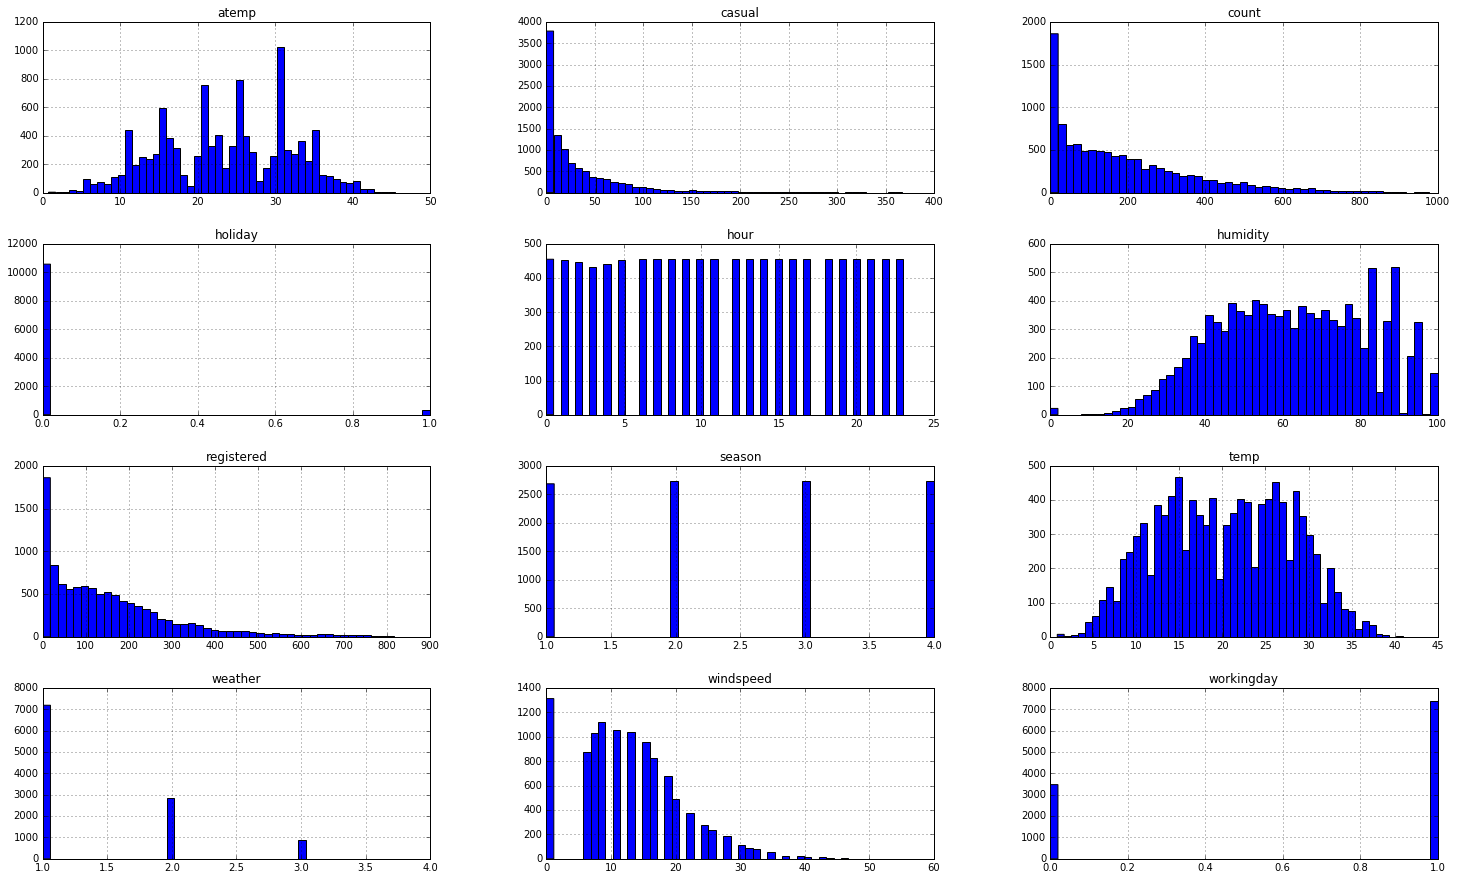

In [7]:
import matplotlib.pyplot as plt
df.ix[:,1:].hist(figsize=(25, 15), bins=50)
plt.show()

### b) Árbol de regresión 

(b) Entrene un ´arbol de regresi´on para resolver el problema usando par´ametros por defecto. Con este
fin, construya una matriz Xtrain de forma ntrain × d1 que contenga los datos de entrenamiento en sus
filas, seleccionando las columnas que desee/pueda utilizar para el entrenamiento. Implemente adem´as, la
funci´on de evaluaci´on que hemos definido anteriormente para este problema. Eval´ue el ´arbol de regresi´on
ajustado a los datos de entrenamiento sobre el conjunto de entrenamiento y pruebas. Construya un
gr´afico que compare las predicciones con los valores reales. En este punto usted debiese tener un modelo
con puntaje del orden de 0.59, lo que lo dejar´a m´as o menos en la posici´on 2140 de la competencia.

SCORE TEST=0.703388
KAGG EVAL TRAIN =0.028516
KAGG EVAL VALIDATION = 0.554511
KAGG EVAL TEST = 0.574239


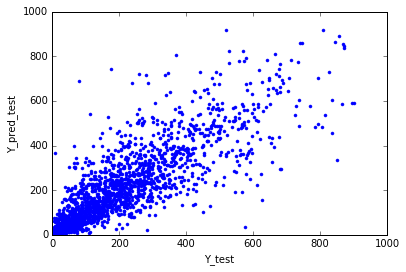

In [9]:
from sklearn.tree import DecisionTreeRegressor as Tree
import matplotlib.pyplot as plt
def eval_bikemodel(y_predict,y_true):
    diff = np.log(y_predict+1.0) - np.log(y_true+1.0)
    return np.sqrt(np.sum(np.square(diff))/len(y_predict))
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour']]
Ydf=df.ix[:,'count']
X_train = Xdf[0:ntrain].values
X_val = Xdf[ntrain:nval].values
X_test = Xdf[nval:].values
Y_train = Ydf[0:ntrain].values
Y_val = Ydf[ntrain:nval].values
Y_test = Ydf[nval:].values

model = Tree(random_state=0)
model.fit(X_train,Y_train)
score_test = model.score(X_test,Y_test)
print "SCORE TEST=%f"%score_test

Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
kagg_test = eval_bikemodel(Y_pred_test,Y_test)

print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VALIDATION = %f"%kagg_val
print "KAGG EVAL TEST = %f"%kagg_test
plt.plot(Y_test,Y_pred_test,'.')
plt.xlabel("Y_test")
plt.ylabel("Y_pred_test")
plt.show()

De los errores obtenidos en cada subconjunto de datos se puede ver que se produce overfitting, ya que se tiene un bajo error de entrenamiento del 0.028, pero un error de validación muy alto respecto al anterior de 0.55

# Mas blah


### c) Mejora del árbol de regresión

(c) Mejore el ´arbol de regresi´on definido en el punto anterior haciendo modificaciones a los hiper-par´ametros
del modelo. Por ejemplo, como estos modelos tienden a sobre-ajustar, podr´ıa intentar limitar la
profundidad del ´arbol (¿Por qu´e esto debiese ayudar?). Naturalmente, est´a absolutamente prohibido
tomar este tipo de decisiones en funci´on del resultado de pruebas. Debe realizar estas elecciones evaluando
sobre el conjunto de validaci´on. Si no desea utilizarlo, y prefiere implementar validaci´on cruzada
u otra t´ecnica autom´atica, tiene la ventaja de poder usar el conjunto de validaci´on como parte del
entrenamiento. Con estas modificaciones debiese poder mejorar su ranking en unas 300 posiciones.

In [4]:
model = Tree(random_state=0,max_depth=20)
model.fit(X_train,Y_train)
Y_pred_val = model.predict(X_val)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL VAL =%f"%kagg_val

KAGG EVAL VAL =0.546219


d) Mejore el ´arbol de regresi´on definido en el punto anterior haciendo modificaciones sobre la representaci´on utilizada para aprender desde los datos. Por ejemplo, los histogramas que construy´o en el punto (a) as´ı como la forma especial de la funci´on de evaluaci´on, sugieren una cierta transformaci´on de la variable respuesta. Podr´ıa intentar tambi´en normalizando los datos o normalizando la respuesta. Otra opci´on es intentar rescatar algo m´as acerca de la fecha (anteriormente s´olo se extrajo la hora), como por ejemplo el a˜no o el d´ıa de la semana (’lunes’,’martes’, etc) que corresponde. Sea creativo, este paso le debiese reportar un salto de calidad muy significativo. Una observaci´on importante es que si hace una transformaci´on a la variable respuesta (por ejemplo ra´ız cuadrada), debe invertir esta transformaci´on antes de evaluar el desempe˜no con eval bikemodel (por ejemplo, elevar al cuadrado si tom´o ra´ız cuadrada). Con modificaciones de este tipo, podr´ıa mejorar su ranking en unas 1000 posiciones, entrando ya al top-1000 con un score del orden de 0.45

In [5]:
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek#0:lunes,6:domingo
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]

(e) Entrene una SVM no lineal para resolver el problema midiendo el efecto de las distintas representaciones
que haya descubierto hasta este punto. Un detalle importante es que antes de entrenar la SVM ser´ıa
aconsejable hacer dos tipos de pre-procesamiento adicional de los datos: (i) codificar las variables
categ´oricas en un modo apropiado - por ejemplo como vector binario con un 1 en la posici´on del
valor adoptado-, (ii) escalar los atributos de modo que queden centrados y con rangos comparables.
Usando par´ametros por defecto para la SVM debiese obtener un score del orden de 0.344, quedando
definitivamente en el top-10 de la competencia.

In [6]:
#load dataframes as before ...
df = pd.concat([dftrain,dfval,dftest])
df['hour'] = pd.to_datetime(df['datetime']).apply(lambda x: x.strftime('%H'))
df['cday'] = pd.to_datetime(df['datetime']).dt.dayofweek
df['hour'] = pd.to_numeric(df['hour'])
df['cday'] = pd.to_numeric(df['cday'])
Xdf=df.ix[:,['season','holiday','workingday','weather','temp','atemp','humidity','windspeed','hour','cday']]
#PASO IMPORTANTE MAS ABAJO ...
Xdf = pd.get_dummies(Xdf,columns=['season', 'weather','hour','cday'])
Ydf=df.ix[:,'count']

from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()
X_train = scalerX.fit_transform(X_train)
X_val = scalerX.fit_transform(X_val)
X_test = scalerX.transform(X_test)

from sklearn.svm import SVR
model = SVR()
model.fit(X_train,Y_train)
Y_pred_train = model.predict(X_train)
Y_pred_val = model.predict(X_val)
Y_pred_test = model.predict(X_test)

(f) Mejore la SVM definida en el punto anterior haciendo modificaciones a los hiper-par´ametros de la
m´aquina (C,  o la misma funci´on de kernel). Naturalmente, est´a absolutamente prohibido tomar este
tipo de decisiones de dise˜no mirando el resultado de pruebas. Debe realizar estas elecciones evaluando
sobre el conjunto de validaci´on. Si no desea utilizarlo, y prefiere implementar validaci´on cruzada
u otra t´ecnica autom´atica, tiene la ventaja de poder usar el conjunto de validaci´on como parte del
entrenamiento.

In [7]:
model = SVR(C=1,epsilon=0.01)
kagg_train = eval_bikemodel(Y_pred_train,Y_train)
kagg_val = eval_bikemodel(Y_pred_val,Y_val)
print "KAGG EVAL TRAIN =%f"%kagg_train
print "KAGG EVAL VAL =%f"%kagg_val

KAGG EVAL TRAIN =nan
KAGG EVAL VAL =nan


(g) Eval´ue el efecto de utilizar el dataset de validaci´on para entrenamiento y seleccionar los par´ametros
estructurales del ´arbol de clasificaci´on y la SVM usando validaci´on cruzada. El c´odigo de ejemplo para
esto ha sido proporcionado en las tareas 1 y 2, pero se adjunta de nuevo a continuaci´on

In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
mse_cv = 0
for train, val in kf.split(Xm):
    model = SVR(C=1,epsilon=0.01) #define your model
    model.fit(Xm[train], ym[train])
    yhat_val = model.predict(Xm[val])
    ytrue_val = ym[val]
    score_fold = eval_bikemodel(yhat_val,ytrue_val)
    mse_cv += score_fold
mse_cv = mse_cv / 10

NameError: name 'Xm' is not defined

(h) Eval´ue el efecto de utilizar un ensamblado de 2 m´aquinas de aprendizaje para predecir la demanda
total de bicicletas. Un modelo se especializar´a en la predicci´on de la demanda de bicicletas de parte
de usuarios registrados y otra en la predicci´on de la demanda de usuarios casuales. Hay razones claras
para pensar que los patrones son distintos.

In [10]:
Ydf=df.ix[:,'count'] #demanda total
Ydf=df.ix[:,'registered'] #demanda registrada
Ydf=df.ix[:,'casual'] #demanda casual

(i) Eval´ue el efecto de utilizar un algoritmo gen´erico para ensamblar m´aquinas de aprendizaje para predecir
la demanda total de bicicletas. Puede experimentar con una sola t´ecnica (e.g. Random Forest), discuta
la evoluci´on a medida que aumenta el n´umero de m´aquinas.

In [13]:
from sklearn.ensemble import RandomForestRegressor
max_depth  = 2 #determinar
model = RandomForestRegressor(n_estimators=10,max_depth=max_depth,random_state=0)